In [7]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tsfresh import extract_features

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('../data_seismSeq1/data_seismic_BagnallTimeSeriesClassification.csv')

In [ ]:
print(df.shape)
df.head()

In [ ]:
df['y'].value_counts()

In [ ]:
df.columns

In [ ]:
df_X = df.drop('y', axis=1)
df_X.columns

In [ ]:
# df_X = df_X.reset_index()

In [ ]:
df = df.reset_index()
df.head(3)

In [ ]:
df_melt = pd.melt(df,
                  id_vars=['index', 'y'],
                  value_vars = df_X.columns,
                  var_name = 'seism_hrAvg',
                  value_name = 'val'
                 )

In [ ]:
df_melt.head(3)

In [ ]:
#df_viz1.shape
#df_viz1 = df_viz1.reset_index(drop=True)

In [ ]:
#df_viz1

In [ ]:
index_viz = 7
df_viz1 = df_melt[df_melt['index'] == index_viz]
df_viz1 = df_viz1.reset_index(drop=True)
print(df_viz1.shape)
#df_viz1['val'].plot()

plt.figure(figsize=(15,7))
plt.style.use('default')
# plt.style.use('seaborn-poster')
plt.plot(df_viz1['seism_hrAvg'].astype(float), df_viz1['val'], 'o-')
#plt.title(str(index_viz));
plt.title('Index is: ' + str(index_viz), fontsize=20);

In [ ]:
df_viz1['seism_hrAvg'].astype(float)

### Extract features

In [ ]:
display(df_melt.head(3))
display(df_melt.tail(3))

In [ ]:
# df_melt['index'].value_counts()

In [ ]:
df_melt2 = df_melt[['index', 'seism_hrAvg', 'val']]

In [ ]:
display(df_melt2.head(3))
display(df_melt2.tail(3))

In [ ]:
extracted_features = extract_features(df_melt2, 
                                      column_id="index", 
                                      column_sort="seism_hrAvg")

In [ ]:
extracted_features.shape

In [ ]:
# 368 negative cases and 93 positive
print(368 + 93)

In [ ]:
extracted_features

### Add y-labels

In [ ]:
print(extracted_features.shape, df['y'].shape)

In [ ]:
df_Xy_tsfresh = extracted_features.copy()
df_Xy_tsfresh['y'] = df['y'].values

In [ ]:
df_Xy_tsfresh.head(3)

In [ ]:
# df_Xy_tsfresh.to_csv('data_seismSeq1_tsfresh1.csv', index=False

### Ingest tsfresh featurized data

In [3]:
df = pd.read_csv('./data_out/data_seismSeq1_tsfresh1.csv')
print(df.shape)
display(df.head(2))

(461, 784)


,val__variance_larger_than_standard_deviation,val__has_duplicate_max,val__has_duplicate_min,val__has_duplicate,val__sum_values,val__abs_energy,val__mean_abs_change,val__mean_change,val__mean_second_derivative_central,val__median,...,val__fourier_entropy__bins_10,val__fourier_entropy__bins_100,val__permutation_entropy__dimension_3__tau_1,val__permutation_entropy__dimension_4__tau_1,val__permutation_entropy__dimension_5__tau_1,val__permutation_entropy__dimension_6__tau_1,val__permutation_entropy__dimension_7__tau_1,val__query_similarity_count__query_None__threshold_0.0,val__mean_n_absolute_max__number_of_maxima_7,y
0,0.0,0.0,1.0,1.0,-1.600000e-06,511.000001,0.832267,0.000000,0.000000,-0.518009,...,1.936366,3.771542,1.135637,1.782047,2.433894,3.041385,3.594402,NaN,3.026608,1
1,0.0,0.0,1.0,1.0,-6.400000e-07,511.000001,0.564933,-0.004495,0.002252,-0.353115,...,1.553520,3.591347,0.722180,1.113370,1.497547,1.869238,2.212260,NaN,4.170268,0


In [5]:
df_y = df[['y']]

df_X = df.drop('y', axis=1)

print(df.shape, df_X.shape, df_y.shape)

(461, 784) (461, 783) (461, 1)


In [11]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=test_size, 
                                                                        stratify=df_y) # random_state=1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(368, 783) (368, 1) (93, 783) (93, 1)


### Initial ML check

(is it the correct label order?)

In [12]:
import xgboost as xgb

In [ ]:
# xgb.XGBClassifier.fit(extracted_features, df[['y']])

In [13]:
clf = xgb.XGBClassifier()
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)

In [14]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
def eval_ml_model(label, y_test_in, y_pred_in):
    """
    Evaluate maching learning (ML) model, binary classification
    """
    print(label)
    print(" ")
    
    score_accuracy = accuracy_score(y_test_in, y_pred_in)
    score_precision = precision_score(y_test_in, y_pred_in)
    score_recall = recall_score(y_test_in, y_pred_in)
    score_f1 = f1_score(y_test_in, y_pred_in)
    score_roc_auc = roc_auc_score(y_test_in, y_pred_in)
    score_confmat = confusion_matrix(y_test_in, y_pred_in)
    
    print('Accuracy: ', score_accuracy)
    print('Precision: ', score_precision)
    print('Recall: ', score_recall)
    print('F1: ', score_f1)
    print('ROC_AUC:', score_roc_auc)
    print(score_confmat)
    viz_confusion_matrix(score_confmat)
    print(" ")
    
def viz_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    # plt.savefig('./figures/confusion_matrix.png', dpi=300)
    plt.show()

xgb1
 


C:\ProgramData\Anaconda2021_05\envs\timeseq2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.7956989247311828
Precision:  0.0
Recall:  0.0
F1:  0.0
ROC_AUC: 0.5
[[74  0]
 [19  0]]


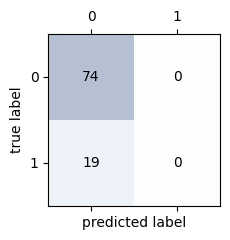

In [17]:
eval_ml_model('xgb1', y_test, y_pred)

In [20]:
display(y_train['y'].value_counts())
display(y_test['y'].value_counts())

0    294
1     74
Name: y, dtype: int64

0    74
1    19
Name: y, dtype: int64

### ML check on "raw" time seq data

In [21]:
df = pd.read_csv('../data_seismSeq1/data_seismic_BagnallTimeSeriesClassification.csv')

In [22]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,-0.518009,-0.518009,2.654211,-0.518009,-0.518009,-0.518009,-0.518009,1.456243,2.558373,-0.518009,...,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,-0.518009,1.465826,-0.518009,1
1,1.943733,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,...,3.365590,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,-0.353115,0
2,2.638517,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,...,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,-0.316102,0


In [23]:
df_y = df[['y']]
df_X = df.drop('y', axis=1)

print(df.shape, df_X.shape, df_y.shape)

(461, 513) (461, 512) (461, 1)


In [24]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=test_size, 
                                                                        stratify=df_y) # random_state=1

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(368, 512) (368, 1) (93, 512) (93, 1)


In [25]:
clf_raw = xgb.XGBClassifier()
clf_raw.fit(X_train, y_train)
y_pred_raw = clf_raw.predict(X_test)

xgb_raw
 
Accuracy:  0.7956989247311828
Precision:  0.5
Recall:  0.15789473684210525
F1:  0.23999999999999996
ROC_AUC: 0.5586770981507824
[[71  3]
 [16  3]]


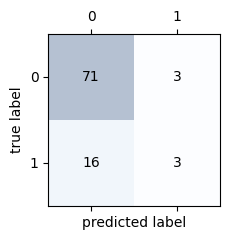

In [27]:
eval_ml_model('xgb_raw', y_test, y_pred_raw)